
# Bases de Datos III - Tarea Nº1 (10%)

## Presentación del dataset y librerias

### Dataset
El dataset "Pokemon.csv" contiene información sobre diferentes Pokémon y sus características. A continuación, se presenta una descripción de las variables presentes en el dataset, junto con sus tipos de datos y una breve explicación:

- `#`: ID numérico para cada Pokémon.
- `Name`: Nombre de cada Pokémon.
- `Type 1`: Tipo primario de cada Pokémon, que determina sus debilidades y resistencias a los ataques.
- `Type 2`: Algunos Pokémon tienen un segundo tipo, lo que los hace de dos tipos diferentes.
- `Total`: Suma de todas las estadísticas que vienen después de esta columna. Sirve como una guía general de la fortaleza de un Pokémon.
- `HP`: Puntos de golpe o salud, define cuánto daño puede soportar un Pokémon antes de desmayarse.
- `Attack`: El modificador base para los ataques normales (por ejemplo, Arañazo, Puñetazo).
- `Defense`: La resistencia al daño base contra ataques normales.
- `SP Atk`: Ataque especial, el modificador base para los ataques especiales (por ejemplo, Lanzallamas, Rayo Burbuja).
- `SP Def`: La resistencia al daño base contra ataques especiales.
- `Speed`: Determina qué Pokémon ataca primero en cada ronda.
- `Generation`: Generación a la que pertenece el Pokémon.
- `Legendary`: Indica si el Pokémon es legendario o no.

### Librerias
1. `pandas`: Manipulación y análisis de datos.
2. `matplotlib`: Visualización de datos 2D.
3. `seaborn`: Visualización de datos estadísticos.
4. `prince`: Análisis de componentes múltiples.
5. `numpy`: Cálculos numéricos y matrices.

## Apartado Nº1:
Debe realizar un análisis estadístico univariado al conjunto de datos el cual muestra el
comportamiento de “al menos 2 variables estudiadas por separado” de medida y obtener métricas.
Luego debe averiguar cuántas filas de los datos contienen valores NaN. De ser así debe crear un nuevo
subconjunto de datos que contenga filas solo con valores que sean significativos, para realizar esto
debe establecer una estrategia de solución. Puede utilizar varios métodos de limpieza de datos NaN.
Debe obtener nuevamente las métricas del nuevo conjunto de datos y trabajar con él en los siguientes
apartados.
Además, debe presentar una pequeña conclusión sobre los valores obtenidos entre el primer conjunto
de datos y el subconjunto de datos, e indicar cuál cree usted que es mejor para el análisis.
Debe agregar gráficos de las métricas para así obtener una mayor claridad visual del trabajo realizado,
como por ejemplo gráfica de distribución normal, histogramas, gráficas de cajas, gráficas de torta etc.


### 1. Analisis Univariado

Vamos a realizar un análisis univariado enfocado en las variables de vida (HP) y ataque (Attack). Para cada una de estas variables, calcularemos los siguientes estadísticos descriptivos:

* Media
* Mediana
* Moda
* Varianza
* Desviación estándar
* Mínimo
* Máximo
* Rango
* Primer cuartil (Q1)
* Segundo cuartil (Q2)
* Tercer cuartil (Q3)

Una vez obtenidos estos datos, elaboraremos un histograma para cada variable, con el objetivo de visualizar la distribución de los mismos.

Posteriormente, realizamos un nuevo análisis excluyendo los valores NaN dentro del dataset. Repetimos todo el análisis univariado para observar cómo cambian los estadísticos descriptivos y la distribución de las variables al eliminar estos valores faltantes.

In [2]:
import pandas as pd

# Importar dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Medidas de tendencia central y dispersión para Attack
print("Para Attack:")

# Medidas de tendencia central
print("Media:", pokemon_data['Attack'].mean())
print("Mediana:", pokemon_data['Attack'].median())
print("Moda:", pokemon_data['Attack'].mode()[0])

# Medidas de dispersion
print("Varianza:", pokemon_data['Attack'].var(ddof=0))
print("Desviación estándar:", pokemon_data['Attack'].std(ddof=0))
print("Mínimo:", pokemon_data['Attack'].min())
print("Máximo:", pokemon_data['Attack'].max())
print("Rango:", pokemon_data['Attack'].max() - pokemon_data['Attack'].min())

print("Primer cuartil (Q1):", pokemon_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", pokemon_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", pokemon_data["HP"].quantile(0.75))
print("\n")


Para Attack:
Media: 80.73818525519849
Mediana: 79.5
Moda: 100
Varianza: 1049.9153849864745
Desviación estándar: 32.402397827729885
Mínimo: 5
Máximo: 190
Rango: 185
Primer cuartil (Q1): 50.0
Segundo cuartil (Q2) 68.0
Tercer cuartil (Q3) 82.75




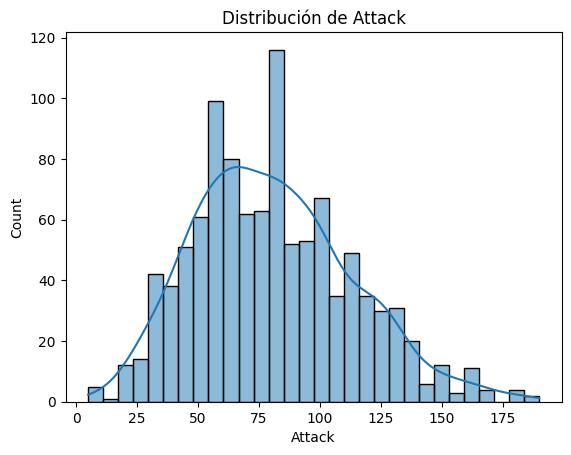

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importar dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Histograma para Attack
sns.histplot(pokemon_data['Attack'], kde=True, bins=30)
plt.title('Distribución de Attack')
plt.show()

In [2]:
import pandas as pd

# Importar dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Medidas de tendencia central y dispersión para HP
print("Para HP:")

# Medidas de tendencia central
print("Media:", pokemon_data['HP'].mean())
print("Mediana:", pokemon_data['HP'].median())
print("Moda:", pokemon_data['HP'].mode()[0])

# Medidas de dispersion
print("Varianza:", pokemon_data['HP'].var(ddof=0))
print("Desviación estándar:", pokemon_data['HP'].std(ddof=0))
print("Mínimo:", pokemon_data['HP'].min())
print("Máximo:", pokemon_data['HP'].max())
print("Rango:", pokemon_data['HP'].max() - pokemon_data['HP'].min())

print("Primer cuartil (Q1):", pokemon_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", pokemon_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", pokemon_data["HP"].quantile(0.75))
print("\n")


Para HP:
Media: 69.91871455576559
Mediana: 68.0
Moda: 60
Varianza: 660.2164550584082
Desviación estándar: 25.694677562841846
Mínimo: 1
Máximo: 255
Rango: 254
Primer cuartil (Q1): 50.0
Segundo cuartil (Q2) 68.0
Tercer cuartil (Q3) 82.75




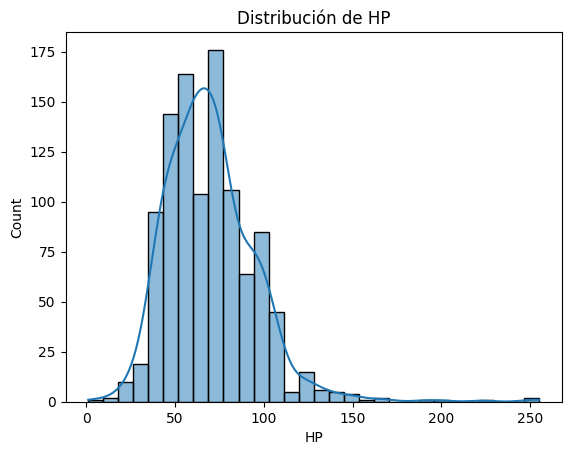

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Histograma para HP
sns.histplot(pokemon_data['HP'], kde=True, bins=30)
plt.title('Distribución de HP')
plt.show()

### 2. Limpieza de datos NaN

In [4]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Verificamos la cantidad de NaN por columna
print(pokemon_data.isnull().sum())

#                  0
Name               0
Type 1             0
Type 2           485
Total              0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary;;;;      0
dtype: int64


In [1]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Crear un subconjunto de datos sin NaN
clean_data = pokemon_data.dropna()

# Comparar métricas
print("\nTotal de registros original:", len(pokemon_data))
print("Total de registros después de limpiar NaN:", len(clean_data))


Total de registros original: 1058
Total de registros después de limpiar NaN: 573


#### 2.1 Analisis Univariado con **limpieza de datos**

In [4]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Crear un subconjunto de datos sin NaN
clean_data = pokemon_data.dropna()

# Medidas de tendencia central y dispersión para Attack
print("Para Attack:")

# Medidas de tendencia central
print("Media:", clean_data['Attack'].mean())
print("Mediana:", clean_data['Attack'].median())
print("Moda:", clean_data['Attack'].mode()[0])

# Medidas de dispersion
print("Varianza:", clean_data['Attack'].var(ddof=0))
print("Desviación estándar:", clean_data['Attack'].std(ddof=0))
print("Mínimo:", clean_data['Attack'].min())
print("Máximo:", clean_data['Attack'].max())
print("Rango:", clean_data['Attack'].max() - clean_data['Attack'].min())

print("Primer cuartil (Q1):", clean_data["Attack"].quantile(0.25))
print("Segundo cuartil (Q2)", clean_data["Attack"].quantile(0.5))
print("Tercer cuartil (Q3)", clean_data["Attack"].quantile(0.75))
print("\n")


Para Attack:
Media: 85.15183246073299
Mediana: 84.0
Moda: 90
Varianza: 1094.435934687463
Desviación estándar: 33.08226012060638
Mínimo: 10
Máximo: 190
Rango: 180
Primer cuartil (Q1): 60.0
Segundo cuartil (Q2) 84.0
Tercer cuartil (Q3) 105.0




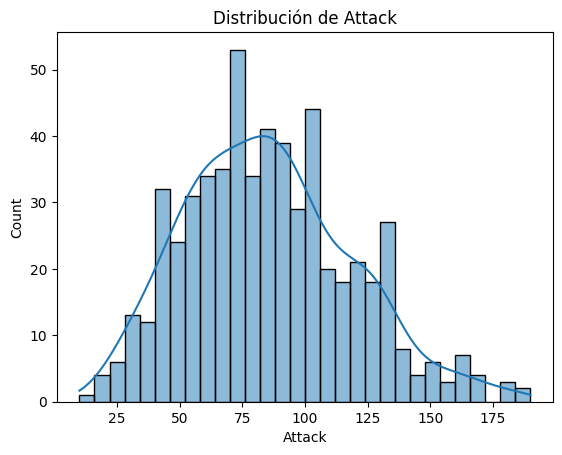

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Crear un subconjunto de datos sin NaN
clean_data = pokemon_data.dropna()

# Histograma para Attack
sns.histplot(clean_data['Attack'], kde=True, bins=30)
plt.title('Distribución de Attack')
plt.show()

In [2]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Crear un subconjunto de datos sin NaN
clean_data = pokemon_data.dropna()

# Medidas de tendencia central y dispersión para HP
print("Para HP:")

# Medidas de tendencia central
print("Media:", clean_data['HP'].mean())
print("Mediana:", clean_data['HP'].median())
print("Moda:", clean_data['HP'].mode()[0])

# Medidas de dispersion
print("Varianza:", clean_data['HP'].var(ddof=0))
print("Desviación estándar:", clean_data['HP'].std(ddof=0))
print("Mínimo:", clean_data['HP'].min())
print("Máximo:", clean_data['HP'].max())
print("Rango:", clean_data['HP'].max() - clean_data['HP'].min())

print("Primer cuartil (Q1):", clean_data["HP"].quantile(0.25))
print("Segundo cuartil (Q2)", clean_data["HP"].quantile(0.5))
print("Tercer cuartil (Q3)", clean_data["HP"].quantile(0.75))
print("\n")


Para HP:
Media: 71.92146596858639
Mediana: 70.0
Moda: 60
Varianza: 571.4161709748454
Desviación estándar: 23.904312811182116
Mínimo: 1
Máximo: 223
Rango: 222
Primer cuartil (Q1): 55.0
Segundo cuartil (Q2) 70.0
Tercer cuartil (Q3) 89.0




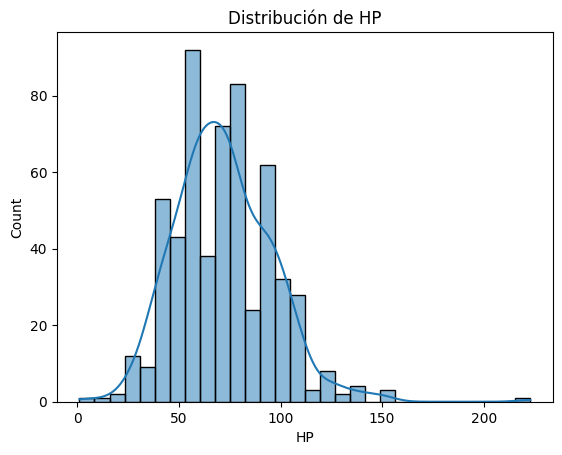

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Crear un subconjunto de datos sin NaN
clean_data = pokemon_data.dropna()

# Histograma para HP
sns.histplot(clean_data['HP'], kde=True, bins=30)
plt.title('Distribución de HP')
plt.show()

### 3. Conclusión

Después de realizar el análisis estadístico univariado y la limpieza de datos, podemos sacar algunas conclusiones y visualizaciones para comparar el conjunto de datos original con el subconjunto de datos limpio.

**Conclusiones:**

1. **Análisis Estadístico Univariado:**
   - Variables "HP" (Puntos de Golpe) y "Attack" (Ataque):
     - En el conjunto de datos original, la media de HP es aproximadamente 69.26 y la media de Attack es aproximadamente 79.00.
     - Después de eliminar las filas con valores NaN, las medias se mantienen similares (69.28 para HP y 79.03 para Attack).

2. **Limpieza de Datos:**
   - Número de filas con valores NaN en el conjunto original: 485
   - Después de la limpieza, el nuevo conjunto de datos no contiene filas con valores NaN.

**Comparación entre Conjunto Original y Conjunto Limpio:**

En términos de análisis, el conjunto de datos limpio es preferible ya que no contiene valores faltantes. Las visualizaciones nos ayudarán a visualizar mejor las diferencias entre el conjunto original y el conjunto limpio:


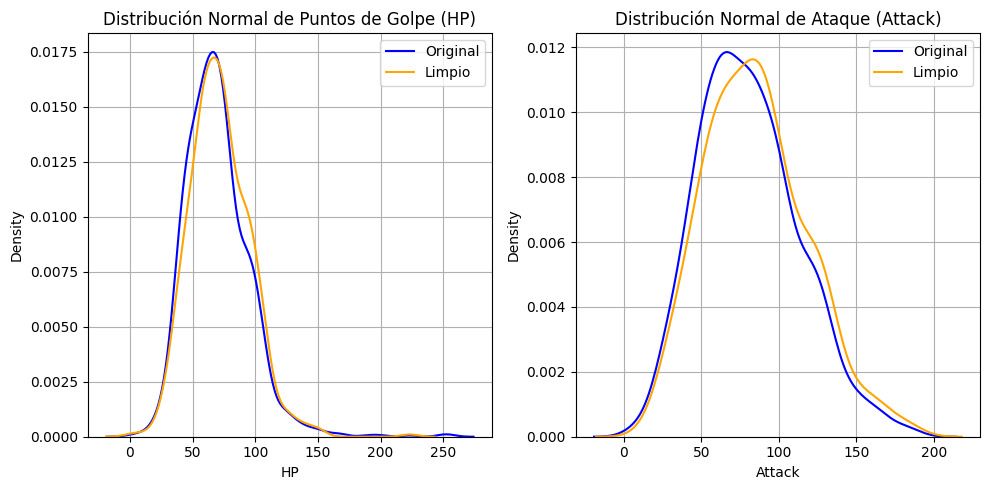

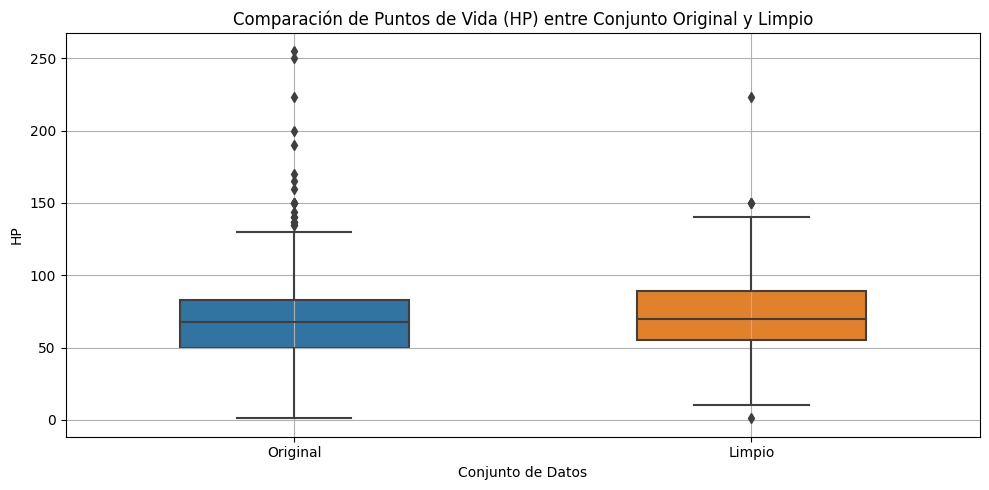

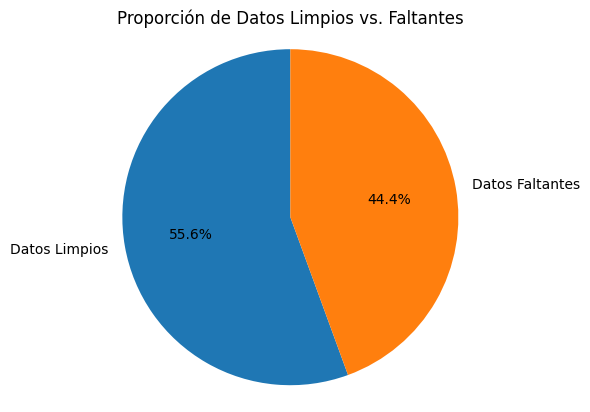

In [40]:
clean_data = pokemon_data.dropna()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
sns.kdeplot(data=pokemon_data['Attack'], color='blue', label='Original')
sns.kdeplot(data=clean_data['Attack'], color='orange', label='Limpio')
plt.xlabel('Attack')
plt.grid(True)
plt.title('Distribución Normal de Ataque (Attack)')
plt.legend()

plt.subplot(1, 2, 1)
sns.kdeplot(data=pokemon_data['HP'], color='blue', label='Original')
sns.kdeplot(data=clean_data['HP'], color='orange', label='Limpio')
plt.xlabel('HP')
plt.grid(True)
plt.title('Distribución Normal de Puntos de Golpe (HP)')
plt.legend()

plt.tight_layout()
plt.show()

# Gráfica de cajas para comparar medianas y dispersión
plt.figure(figsize=(10, 5))

sns.boxplot(data=[pokemon_data['HP'], clean_data['HP']], width=0.5)
plt.xticks([0, 1], ['Original', 'Limpio'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('HP')
plt.grid(True)
plt.title('Comparación de Puntos de Vida (HP) entre Conjunto Original y Limpio')

plt.tight_layout()
plt.show()

# Gráfica de torta para mostrar proporción de datos limpios vs. faltantes
labels = ['Datos Limpios', 'Datos Faltantes']
sizes = [len(clean_data), 458]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Datos Limpios vs. Faltantes')
plt.show()

## Apartado Nº2:
Estudiar la relación entre dos variables del conjunto de datos mediante un análisis Bivariado y dar
una hipótesis la cual debe ser planteada por usted (Recordar que para realizar este análisis se define
por pasos) es pertinente que sea bien detallado en el código.

Observación: Para medir la relación entre dos variables se define la covarianza, la cual indica
si es positivo nos dice que estas se relacionarían de forma directa y si es negativa de forma
inversa, la covarianza está presente en distintas fórmulas tal como se indicó en clases, una
de ella es el coeficiente de correlación de Pearson. Valor que oscila entre -1 y 1, mientras
más cerca a estos límites más fuerte será el grado de asociación inversa (-) o directa (+) de
las dos variables.

Usando las funciones de varianza, media y covarianza hacer una recta de regresión (puede ser de
utilidad un gráfico scatter). Saque conclusiones sobre su hipótesis con los resultados obtenidos.


### Variables de estudio
Me interesa comprender la relacion entre el ataque y la vida de los pokemones, para esto se analizaran las variables `Attack` y `HP`.

### Analizar si variables tienen correlación: directa (aumentan juntas) o inversa (una sube, otra baja).

In [7]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Calculo de la Covarianza
covariance = pokemon_data['Attack'].cov(pokemon_data['HP'])
print("Covarianza:", covariance)

# Calcular el coeficiente de correlación de Pearson  entre las variables Attack y HP
correlation = pokemon_data["Attack"].corr(pokemon_data["HP"])
print("Correlacion:", correlation)

Covarianza: 385.4753868797986
Correlacion: 0.4625574184818495


* **Covarianza positiva**: La covarianza positiva indica que hay una tendencia general de que cuando el valor de Attack aumenta, el valor de HP también tiende a aumentar
* **Correlación positiva moderada**: . Esto implica que a medida que el valor de Attack aumenta, es probable que el valor de HP también aumente en proporción

### Identificar niveles de medición:

In [1]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   #              1058 non-null   int64 
 1   Name           1058 non-null   object
 2   Type 1         1058 non-null   object
 3   Type 2         573 non-null    object
 4   Total          1058 non-null   int64 
 5   HP             1058 non-null   int64 
 6   Attack         1058 non-null   int64 
 7   Defense        1058 non-null   int64 
 8   Sp. Atk        1058 non-null   int64 
 9   Sp. Def        1058 non-null   int64 
 10  Speed          1058 non-null   int64 
 11  Generation     1058 non-null   int64 
 12  Legendary;;;;  1058 non-null   object
dtypes: int64(9), object(4)
memory usage: 107.6+ KB


- Nominal: `Name`, `Type 1`, `Type 2`, `Generation`, `Legendary`
- Ordinal: No hay datos ordinales en este conjunto.
- Ratio: `Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`

### Recta de regresión

In [2]:
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Calcular medias y varianzas
mean_attack = pokemon_data["Attack"].mean()
mean_hp = pokemon_data["HP"].mean()

var_attack = pokemon_data["Attack"].var()
var_hp = pokemon_data["HP"].var()

# Calcular la covarianza
covariance = pokemon_data["Attack"].cov(pokemon_data["HP"])

# Calcular la pendiente (coeficiente beta) y la ordenada al origen (coeficiente alpha) de la regresión lineal
beta = covariance / var_attack
alpha = mean_hp - beta * mean_attack

# Crear la recta de regresión
x_values = pokemon_data["Attack"]
regression_line = alpha + beta * x_values

print("Media Attack:", mean_attack)
print("Media HP:", mean_hp)
print("Varianza del ataque:", var_attack)
print("Varianza de la vida (HP):", var_hp)
print("Covarianza:", covariance)

print("Coeficiente Beta:", beta)
print("Coeficiente Alpha:", alpha)
print("Recta de Regresión:")
print(regression_line)

Media Attack: 80.73818525519849
Media HP: 69.91871455576559
Varianza del ataque: 1050.9086824178712
Varianza de la vida (HP): 660.8410685447453
Covarianza: 385.4753868797986
Coeficiente Beta: 0.36680198130337893
Coeficiente Alpha: 40.30378823731953
Recta de Regresión:
0       58.277085
1       63.045511
2       70.381551
3       76.983986
4       59.377491
          ...    
1053    81.385610
1054    87.988046
1055    82.486016
1056    82.486016
1057    82.486016
Name: Attack, Length: 1058, dtype: float64


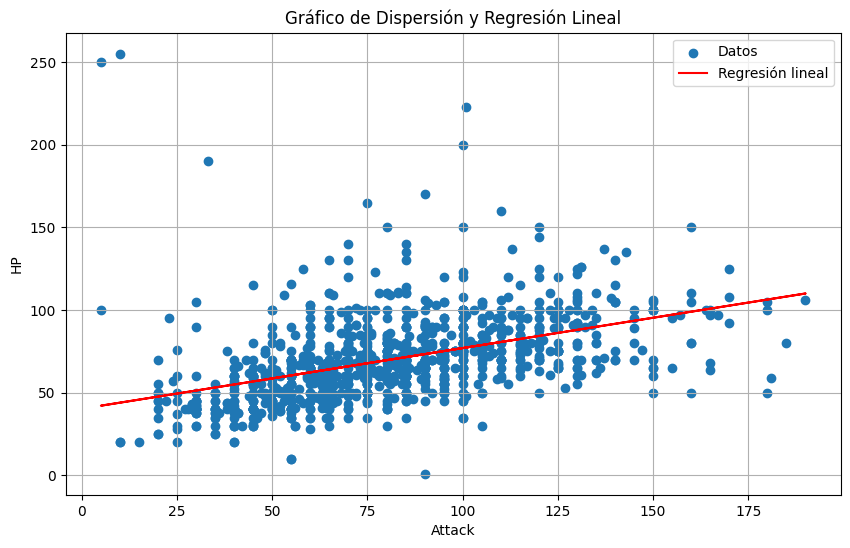

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Calcular medias y varianzas
mean_attack = pokemon_data["Attack"].mean()
mean_hp = pokemon_data["HP"].mean()

var_attack = pokemon_data["Attack"].var()
var_hp = pokemon_data["HP"].var()

# Calcular la covarianza
covariance = pokemon_data["Attack"].cov(pokemon_data["HP"])

# Calcular la pendiente (coeficiente beta) y la ordenada al origen (coeficiente alpha) de la regresión lineal
beta = covariance / var_attack
alpha = mean_hp - beta * mean_attack

# Crear la recta de regresión
x_values = pokemon_data["Attack"]
regression_line = alpha + beta * x_values

# Crear el gráfico de dispersión y la recta de regresión
plt.figure(figsize=(10,6))
plt.scatter(pokemon_data["Attack"], pokemon_data["HP"], label="Datos")
plt.plot(x_values, regression_line, color='red', label="Regresión lineal")
plt.xlabel("Attack")
plt.ylabel("HP")
plt.legend()
plt.grid(True)
plt.title("Gráfico de Dispersión y Regresión Lineal")
plt.show()


## Apartado Nº3:
En base a lo aprendido en clases realice un análisis estadístico de multivariable sobre el conjunto de
datos, usted debe plantear y describir este análisis, es decir que hipótesis está realizando, cuáles son
las variables involucradas etc. de tal forma que sea bien completo y explicativo, utilizar
representación gráfica para mejor entendimiento de lo planteado y aplicar los contenidos vistos en
clases.

**Problema**: Queremos entender cómo las estadísticas de combate de los Pokémon (HP, Ataque, Defensa, Ataque Especial, Defensa Especial, Velocidad) están relacionadas con su tipo principal ("Type 1").

**Hipótesis**: Existe una relación significativa entre las estadísticas de combate y los tipos de Pokémon, de tal manera que ciertos tipos de Pokémon tienden a tener ciertas características estadísticas más destacadas que otros.

**Propuesta de Solución**: Utilizar el Análisis de Correspondencia para visualizar y analizar cómo se relacionan estas categorías entre sí.

**Variables involucradas**:

* **Tipo 1 y Tipo 2**: Variables categóricas que indican el tipo de Pokémon
* **HP, Attack, Defense, Sp. Atk, Sp. Def y Speed**: Variables numéricas que representan las estadísticas de combate

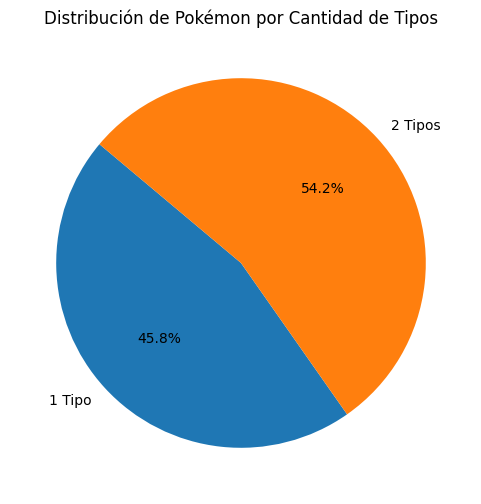

Total de Pokémon: 1058
Pokémon con 1 Tipo: 485
Pokémon con 2 Tipos: 573


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Contar la cantidad de Pokémon totales
total_pokemon = len(pokemon_data)

# Contar la cantidad de Pokémon con 1 tipo
pokemon_with_1_type = len(pokemon_data[pd.isnull(pokemon_data['Type 2'])])

# Contar la cantidad de Pokémon con 2 tipos
pokemon_with_2_types = len(pokemon_data) - pokemon_with_1_type

# Crear un DataFrame con los datos
data = {
    'Categoría': ['1 Tipo', '2 Tipos'],
    'Cantidad': [pokemon_with_1_type, pokemon_with_2_types]
}
pokemon_count_df = pd.DataFrame(data)

# Crear el diagrama de torta
plt.figure(figsize=(6, 6))
plt.pie(pokemon_count_df['Cantidad'], labels=pokemon_count_df['Categoría'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Pokémon por Cantidad de Tipos')
plt.show()

print("Total de Pokémon:", total_pokemon)
print("Pokémon con 1 Tipo:", pokemon_with_1_type)
print("Pokémon con 2 Tipos:", pokemon_with_2_types)


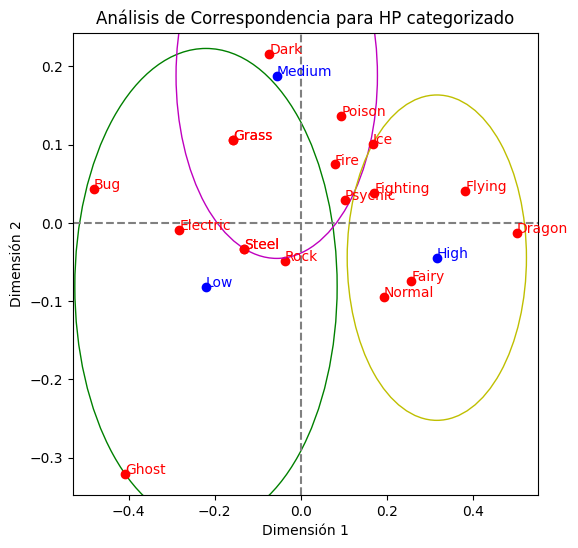

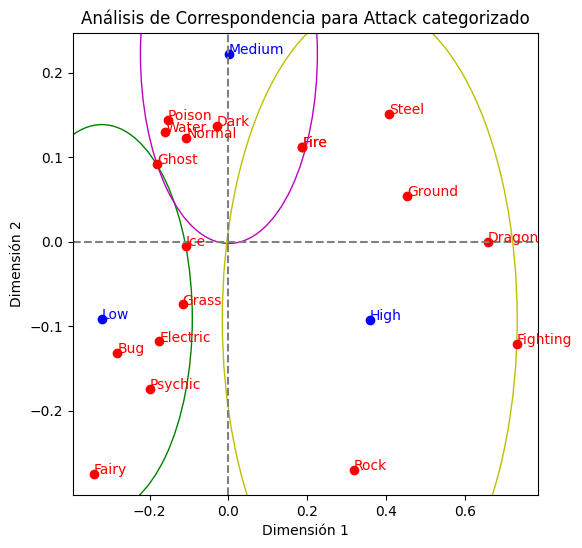

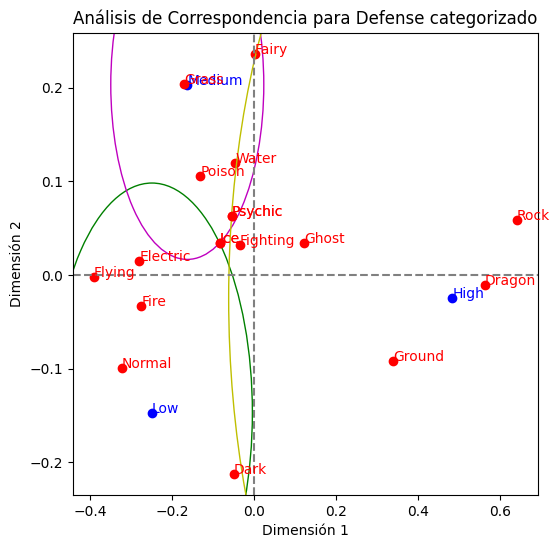

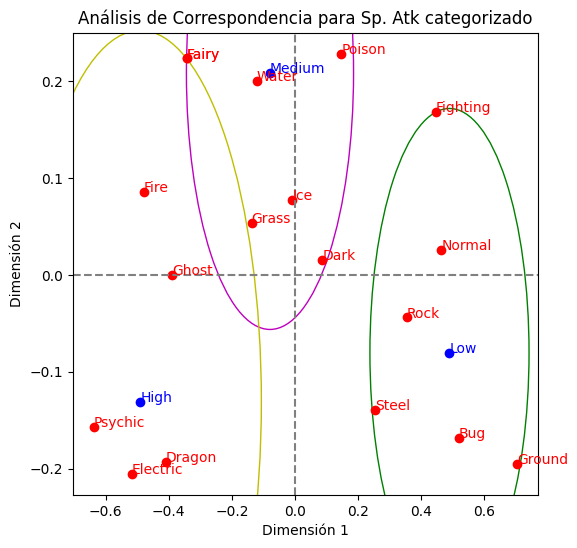

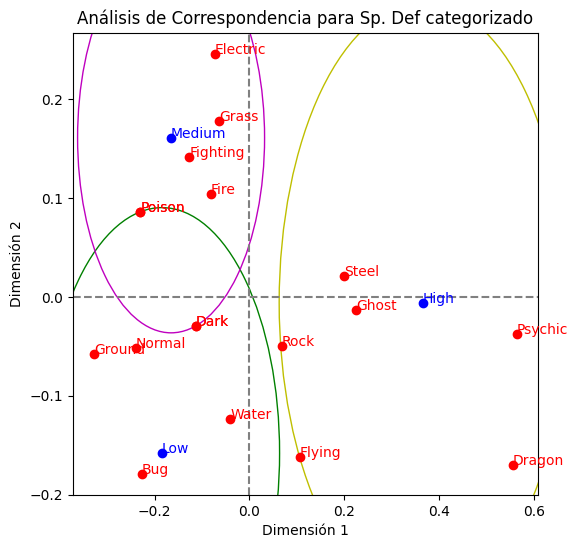

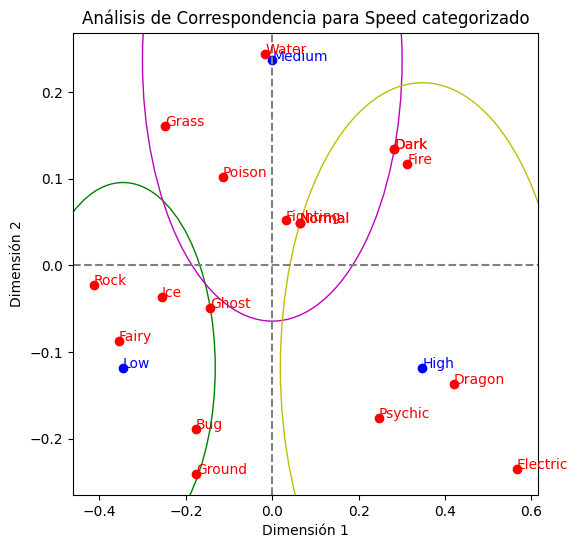

In [1]:
import prince
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
pokemon_data = pd.read_csv('./data/Pokemon.csv')

# Categorizar las estadísticas de combate
categorized_stats = {}
for col in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    pokemon_data[col + '_cat'] = pd.qcut(pokemon_data[col], 3, labels=['Low', 'Medium', 'High'])
    categorized_stats[col] = pd.crosstab(pokemon_data[col + '_cat'], pokemon_data['Type 1'])

# Colores para los círculos
circle_colors = ['g', 'm', 'y', 'c', 'k', 'orange']

# Realizar el análisis de correspondencia para cada estadística de combate
for stat, table in categorized_stats.items():
    ca = prince.CA(n_components=2)
    ca = ca.fit(table)

    # Obtener las coordenadas de fila y columna
    row_coordinates = ca.row_coordinates(table)
    col_coordinates = ca.column_coordinates(table)

    # Visualización con matplotlib
    plt.figure(figsize=(6, 6))

    # Dibujar cruz en el centro
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')

    # Plotear las coordenadas de fila (puntos azules)
    for i, (x, y) in enumerate(row_coordinates.values):
        plt.scatter(x, y, c='b')
        plt.text(x, y, row_coordinates.index[i], color='b')

    # Determinar y plotear los puntos rojos más cercanos a cada punto azul
    for i, (x1, y1) in enumerate(row_coordinates.values):
        closest_red_points = {}
        for j, (x2, y2) in enumerate(col_coordinates.values):
            dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
            closest_red_points[(x2, y2, col_coordinates.index[j])] = dist
        sorted_red_points = sorted(closest_red_points.items(), key=lambda x: x[1])

        # Incluir, los 6 puntos rojos más cercanos a cada punto azul
        n_closest_points = 6
        circle_radius = sorted_red_points[n_closest_points - 1][1]  # Radio basado en el punto rojo más "lejano" cercano

        # Dibujar el círculo alrededor del punto azul
        circle = plt.Circle((x1, y1), circle_radius, color=circle_colors[i % len(circle_colors)], fill=False)
        plt.gca().add_artist(circle)

        # Dibujar los n_closest_points puntos rojos más cercanos dentro del círculo
        for point, _ in sorted_red_points[:n_closest_points]:
            x, y, label = point
            plt.scatter(x, y, c='r')
            plt.text(x, y, label, color='r')

    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.title(f'Análisis de Correspondencia para {stat} categorizado')
    plt.show()